# Advanced Cryptography — Lab 4 (Side Channel Attacks)

**Author:** Vinicius MOREIRA NASCIMENTO — ENSICAEN, 3A Informatique (CyIA), 2025  
**Course:** Advanced Cryptography  
**Topic:** Simple Power analysis (SPA) attack in Elliptic Curves.

Challenge Double and Broken from the CryptoHack platform (end of the section Elliptic Curves, subsection Side Channel) : We’ve managed to get power readings from scalar multiplication on the Secp256k1 curve. Can you recover the private key from the data dump from 50 repeated multiplications ?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ast

Challenge files:
  - source_snippet.py: The source code for encryption
  - collected_data.txt: This is 50 samples of repeated multiplications with 359 values each

In [4]:
with open('./data_Lab5/collected_data.txt', 'r') as f:
    data_str = f.read()

power_values = ast.literal_eval(data_str)
power_values = np.array(power_values)

print(power_values[1])
print(power_values.shape)

[163  66 205 136 187 140 194  87 141 164  93  71 165 167 117 108 113 170
 120 121  99 107 103 129  91 112 153 132 130 118 183  69  83 158  89 113
 213 196 202 130 174  97 163  84  96 102 104 131 141 180  73  66 110 163
 209  84 155 184 150 102  95 116 143  87 173 142  73 130 163  97  72 122
 132 202 124 126 111 177  97  88 120 135 158 105 194 191 202 114 157 134
 108  67 112 121 172  66 150  96 114  87 192 193  80  96 149 199  77 124
 185  96 133  95 133 214 121 121 168 127 134 105 102 204  71 213 101 151
 123 105  87 123 107 132 131 163 125  80 209 159  80 128 148 135  97  79
 103 214  90 123 183 181 113  71 127 126 133  99 104 190 203  81 201 126
 115 125 109  82 214  87  83 106 158 123 115 144 134 119  91 105 172 103
 196 170 121 109 146 157  75  83  95 132 215 123 105 134 212 195 125 104
 186  71 193 170 131  84 117 132 174 127 104 110 176 146  76 152 162 125
 147 114 117 123 192 159  82  84  82 149 151 169  78 125 162 121  98 162
 189 130 108 167 124  82  81  69 159 107 207 144  8

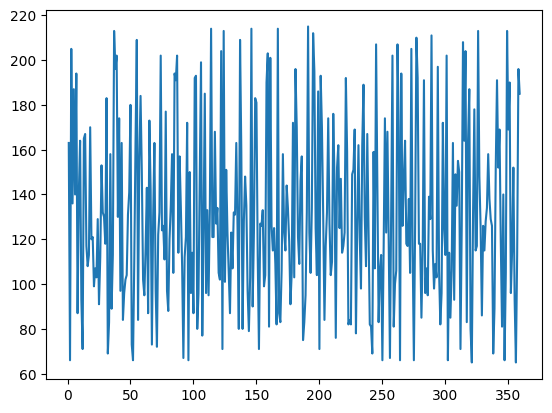

<Figure size 1000x1200 with 0 Axes>

In [5]:
plt.plot(range(1, len(power_values[1]) + 1), power_values[1])
plt.figure(figsize=(10,12))
plt.show() 

In [6]:
def normalize_array(array):
    """
    Simple 'normalization' > subtract each value from the mean of the row
    """
    array_mean = np.mean(array, axis = 1)
    for i in range(len(array_mean)):
        array[i] = array[i,:] - array_mean[i]
    return array 

In [7]:
p_values_norm = normalize_array(power_values)
p_values_norm

array([[-30, -10, -16, ..., -47, -18,  39],
       [ 31, -65,  73, ..., -18,  64,  53],
       [ 29, -18,  72, ..., -51,  54,  62],
       ...,
       [  3, -24,  38, ...,  -6,  10, -13],
       [ 71,  -4,  10, ..., -37,  75,  -5],
       [-14, -20,  58, ..., -62,  60,  41]])

In [8]:
def power_binarization(array):
    """
    Takes the power values array already reduced by the mean of each sampling
    Do the calculus to see for each column which bit the values represents by majority vote
    """
    bits = []
    for j_idx in range(array.shape[1]):
        bit_column = array[:, j_idx]
        positive_votes = sum(1 for value in bit_column if value >= 0)
        
        if (positive_votes >= len(bit_column) / 2):
            bits.append(1)
        else:
            bits.append(0)
    return bits

In [9]:
bits_by_power = power_binarization(p_values_norm)
bits_by_power.append(0)
print(len(bits_by_power))

360


In [10]:
def bitstring_to_bytes(s):
    v = int(s, 2)
    b = bytearray()
    while v:
        b.append(v & 0xff)
        v >>= 8
    return bytes(b[::-1])

In [11]:
bits_str = "".join(map(str, bits_by_power))
bits_str = bits_str[::-1]
print(bits_str)
byte_p = bitstring_to_bytes(bits_str)
print(byte_p)

011000110111001001111001011100000111010001101111011110110101001101101001011001000011001101011111011000110110100000110100011011100110111000110011011011000111001101011111011000110011010001101110010111110110001001110010001100110011010001101011010111110111001100110011011000110111010101110010001100110101111101100011011101010111001001110110001100110111001101111101
b'crypto{Sid3_ch4nn3ls_c4n_br34k_s3cur3_curv3s}'
